<a href="https://colab.research.google.com/github/sausterm/DiscordDataAnalysis/blob/master/Week_2_World_Happiness_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## This Notebook is an extention of the Week 1 Anylsis on World Happiness
I have used PCA to reduce the dimensionality of the data to 2. This is then plotted on with the happiness score indicated by color. 

Next, I run the K-Mean Clustering algorithm on both the regular data and the reduced data. 

In [7]:
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()


Saving World_Happiness_2015_2017_(updated).csv to World_Happiness_2015_2017_(updated).csv


In [0]:
data = pd.read_csv('World_Happiness_2015_2017_(updated).csv')
data = data.groupby('Country').mean()
countries = data.index
happy_score = data['Happiness Score']
data.drop(columns=['Happiness Rank','Happiness Score','Year','Dystopia Residual'],inplace=True)


In [11]:
happy_score = pd.DataFrame(data=happy_score)
happy_score.set_index(countries,inplace=True)
happy_score

,Happiness Score
Country,
Afghanistan,3.576333
Albania,4.752667
Algeria,5.944000
Angola,3.898000
Argentina,6.607667
...,...
Venezuela,6.048000
Vietnam,5.165000
Yemen,3.798000


In [0]:
#### PCA and Clustering Analysis ###
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)

In [13]:
print(data.shape)
print(x_pca.shape)

(166, 6)
(166, 2)


In [14]:
data_reduce = pd.DataFrame(x_pca,countries)
data_reduce = pd.merge(data_reduce,happy_score,left_index=True,right_index=True)
data_reduce

,0,1,Happiness Score
Country,,,
Afghanistan,0.891168,0.315168,3.576333
Albania,0.036406,0.323055,4.752667
Algeria,-0.093398,0.094270,5.944000
Angola,0.377662,0.076691,3.898000
Argentina,-0.341651,-0.091144,6.607667
...,...,...,...
Venezuela,-0.258838,-0.043791,6.048000
Vietnam,0.090344,-0.096227,5.165000
Yemen,0.518134,0.122677,3.798000


Text(0, 0.5, 'Second Principal Component')

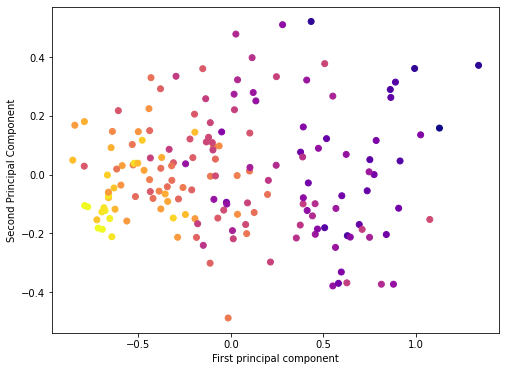

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data_reduce[0],data_reduce[1],c=data_reduce['Happiness Score'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

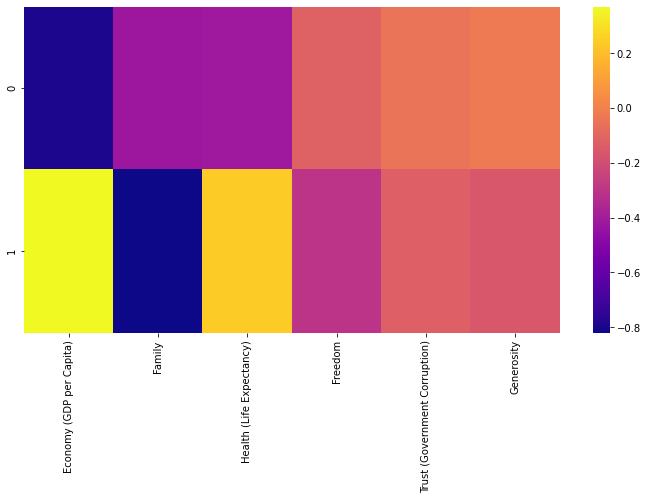

In [16]:
df_comp = pd.DataFrame(pca.components_,columns=data.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

data = pd.read_csv('World_Happiness_2015_2017_(updated).csv')
data = data.groupby('Country').mean()
data_full = data.drop('Year',axis=1)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


Text(0, 0.5, 'Second Principal Component')

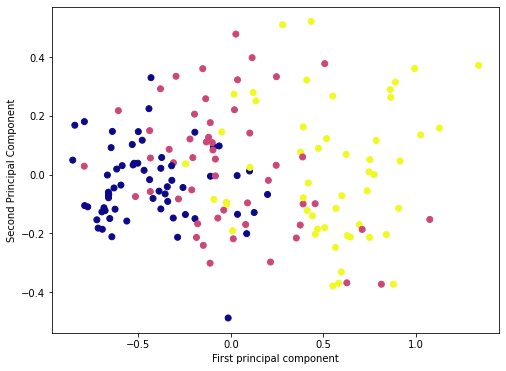

In [28]:
kmeans.fit(data_full)
full_labels = kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(data_reduce[0],data_reduce[1],c=kmeans.labels_,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

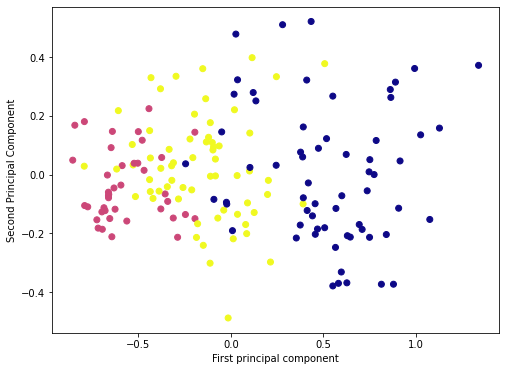

In [38]:
### Clustering with PCA ###
kmeans.fit(data_reduce)
reduce_labels = kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(data_reduce[0],data_reduce[1],c=kmeans.labels_,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


In [0]:
categorized = list(zip(data_reduce.index,reduce_labels))
cat1 = []
cat2 = []
cat3 = []
for i in range(len(categorized)):
  if categorized[i][1] == 0:
    cat1.append(categorized[i][0])
  elif categorized[i][1] == 1:
    cat2.append(categorized[i][0])
  else:
    cat3.append(categorized[i][0])


In [50]:
print(len(cat1), ' countries in category 1', '\n',len(cat2), ' countries in category 2', '\n',
      len(cat3), ' countries in category 3', '\n')

63  countries in category 1 
 40  countries in category 2 
 63  countries in category 3 



In [51]:
print(cat1)

['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Bangladesh', 'Benin', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Haiti', 'India', 'Iran', 'Iraq', 'Ivory Coast', 'Kenya', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Palestinian Territories', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'Somaliland Region', 'Somaliland region', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Swaziland', 'Syria', 'Tajikistan', 'Tanzania', 'Togo', 'Uganda', 'Ukraine', 'Yemen', 'Zambia', 'Zimbabwe']


In [52]:
print(cat3)

['Algeria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'China', 'Croatia', 'Cyprus', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hong Kong S.A.R., China', 'Hungary', 'Indonesia', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia', 'Malaysia', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nicaragua', 'Nigeria', 'North Cyprus', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'South Korea', 'Suriname', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uzbekistan', 'Venezuela', 'Vietnam']


In [53]:
print(cat2)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Israel', 'Kuwait', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Puerto Rico', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Taiwan Province of China', 'Thailand', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay']
